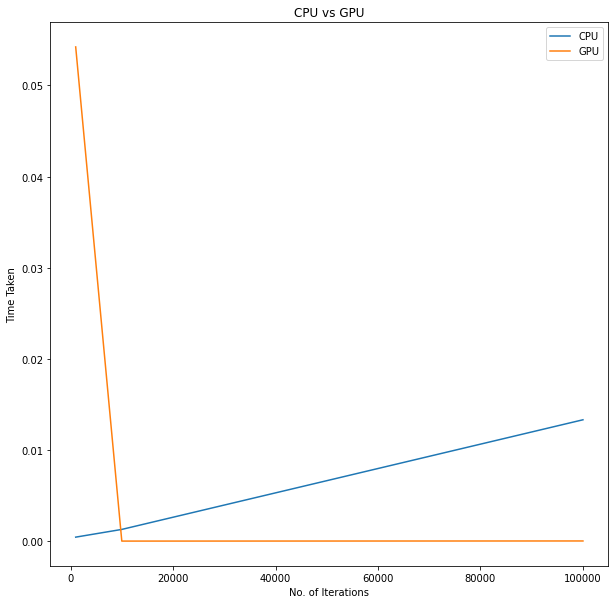

In [38]:
from numba import jit, cuda
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as analytics
# to measure exec time
from timeit import default_timer as timer 
import matplotlib.pyplot as graph

# normal function to run on cpu
def func(a,r):							 
	for i in range(r):
		a[i]+= 1	

# function optimized to run on gpu 
@jit(target_backend='cuda')						 
def func2(a,r):
	for i in range(r):
		a[i]+= 1
# if __name__=="__main__":
limit = 100000
time_taken_cpu = []
time_taken_gpu = []
r = 1000
x = []

while r <= limit :
    a = np.ones(r, dtype = np.float64)

    start = timer()
    func(a,r)
    time_taken_cpu.append(timer()-start)
    # print("without GPU:", timer()-start) 
    
    start = timer()
    func2(a,r)
    time_taken_gpu.append(timer()-start)
    x.append(r)
    # print("with GPU:", timer()-start)
    r = r*10

figure = graph.figure(figsize = (10,10))
graph.plot(x,time_taken_cpu, label = "CPU")
graph.plot(x,time_taken_gpu, label = "GPU")
graph.xlabel("No. of Iterations")
graph.ylabel("Time Taken")
graph.title("CPU vs GPU")
graph.legend()
graph.show()
